In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

# List of possible encodings to try 
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv' # Change this to the path of your csv file

# Attempt to read the CSV file with different encodings 
for encoding in encodings: 
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break # Stop the loop if successful 
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue # Try the next encoding

# If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3341,ham,"I haven't forgotten you, i might have a couple...",NaN,NaN,NaN
3232,ham,Yup Ì_ not comin :-(,NaN,NaN,NaN
1847,ham,I dont want to hear philosophy. Just say what ...,NaN,NaN,NaN
2679,ham,Solve d Case : A Man Was Found Murdered On &l...,NaN,NaN,NaN
5208,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN


In [4]:
df.shape

(5571, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5571 non-null   object
 1   v2          5571 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [7]:
# drop Last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
180,ham,Lol no. U can trust me.
2934,ham,And stop wondering \wow is she ever going to s...
3512,ham,I always chat with you. In fact i need money c...
1601,ham,Ok pa. Nothing problem:-)
4895,ham,I cant pick the phone right now. Pls send a me...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1658,ham,"Yeah, where's your class at?"
2762,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
2116,ham,Wish u many many returns of the day.. Happy bi...
4170,ham,"Sorry, I'll call later"
3712,ham,"Oh, i will get paid. The most outstanding one ..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5168, 2)

2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [19]:
df['target'].value_counts()

target
0    4515
1     653
Name: count, dtype: int64

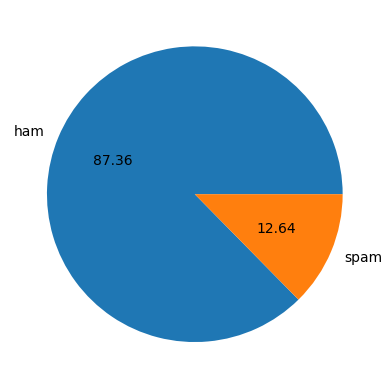

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Big Chuck of hamand very less spam so out data is not balanced 

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len) #number of char

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,0,U dun say so early hor... U c already then say...,49
3,0,"Nah I don't think he goes to usf, he lives aro...",61
4,1,FreeMsg Hey there darling it's been 3 week's n...,148


In [27]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
2,0,U dun say so early hor... U c already then say...,49,13
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15
4,1,FreeMsg Hey there darling it's been 3 week's n...,148,39


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))#sentence

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.988003,18.457817,1.965557
std,58.238279,13.325253,1.448681
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.468882,17.125803,1.820155
std,56.361731,13.494781,1.383808
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

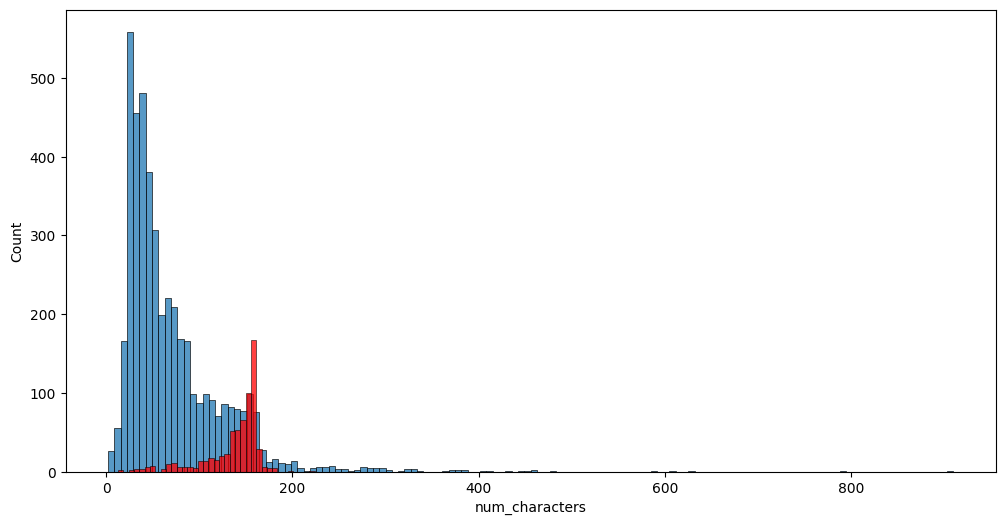

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_characters'])
sns.histplot(df[df['target'] == 1] ['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

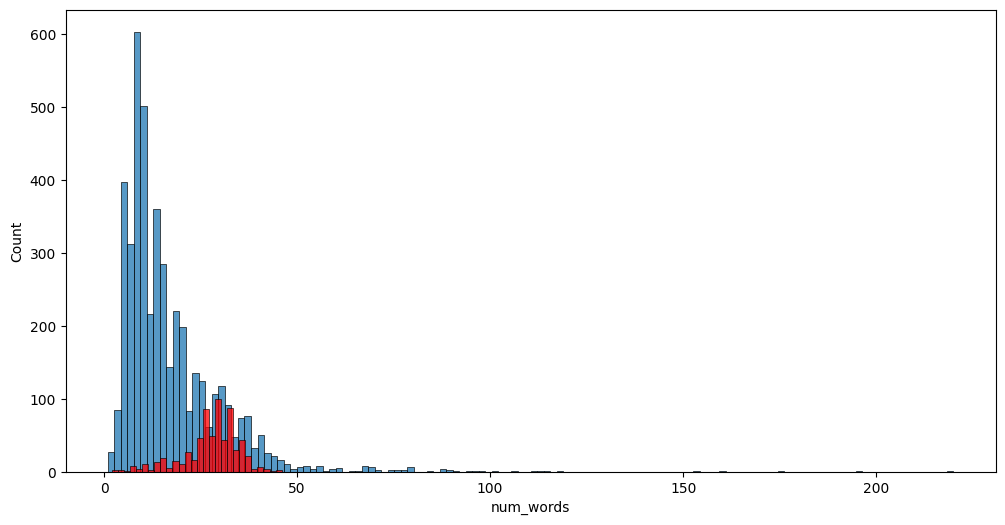

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'],color='red')

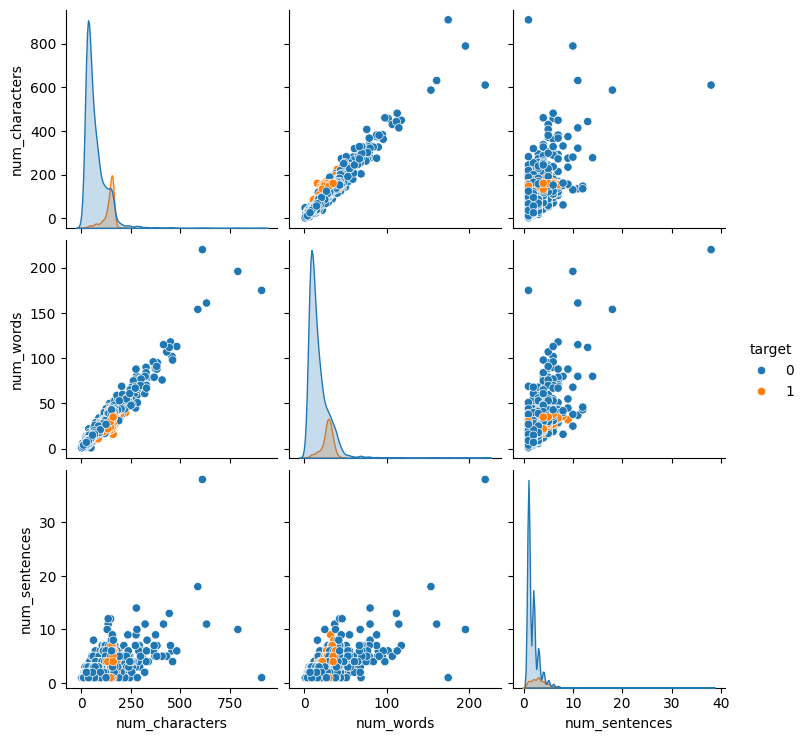

In [37]:
sns.pairplot(df,hue='target')

In [ ]:
sns.heatmap(df.corr(),annot=Ture)

3. Data Preprocessing


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download the stopwords dataset
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Remove stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Stem the words
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)
    
# Example usage
text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat."
print(transform_text(text))
       

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [45]:
df['text'][100]

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df [df['target'] == 1]['transformed_text'].str.cat(sep=" "))

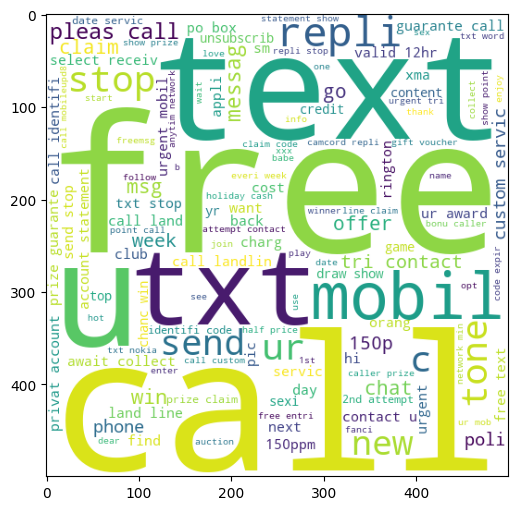

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df [df['target'] == 0]['transformed_text'].str.cat(sep=" "))

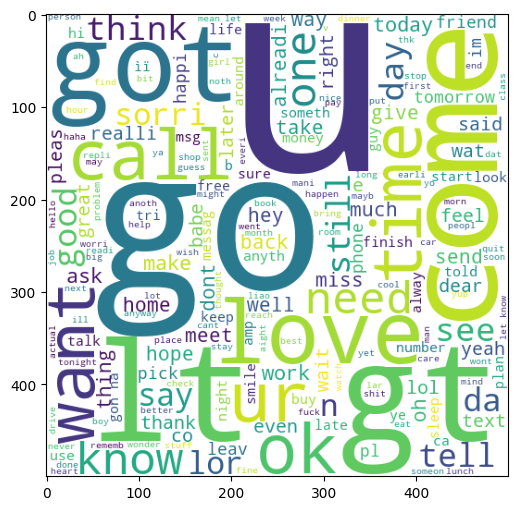

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


In [55]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [56]:
# Initialize an empty list to store words from spam messages
spam_corpus = []

# Iterate over each message in the DataFrame where 'target' is 1 (spam)
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    # Split each message into words and append them to the spam_corpus list
    for word in msg.split():
        spam_corpus.append(word)

# Example usage: Print the first 10 words in the spam_corpus
print(spam_corpus[:10])

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']


In [57]:
len(spam_corpus)

9939

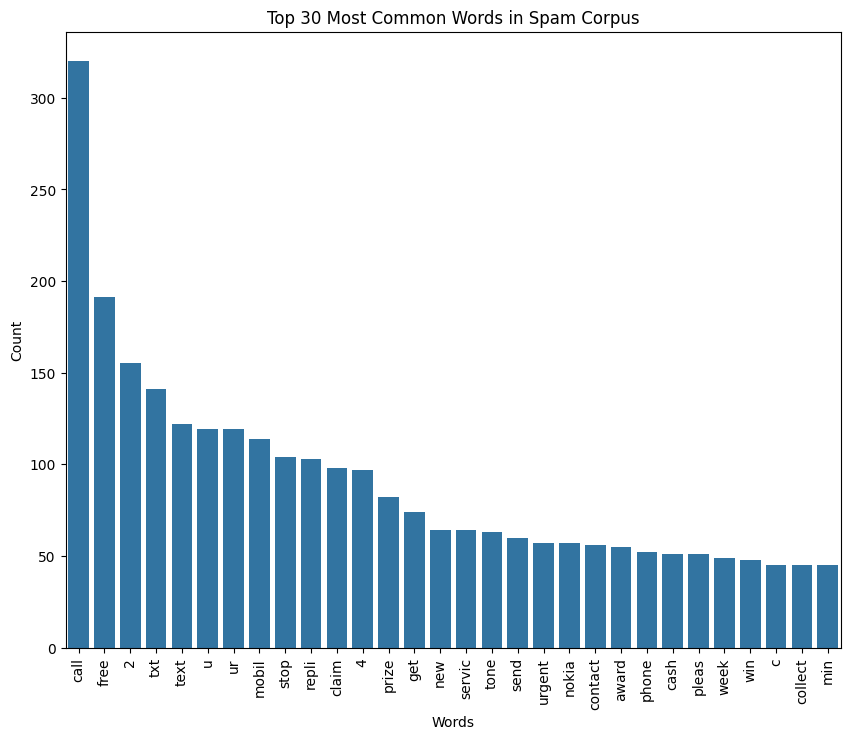

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming spam_corpus is already defined
# spam_corpus = [...]

# Get the 30 most common words
most_common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [59]:
# Initialize an empty list to store words from ham messages
ham_corpus = []

# Iterate over each message in the DataFrame where 'target' is 0 (ham)
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # Split each message into words and append them to the ham_corpus list
    for word in msg.split():
        ham_corpus.append(word)

# Example usage: Print the first 10 words in the ham_corpus
print(ham_corpus[:10])

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la']


In [60]:
len(ham_corpus)

35398

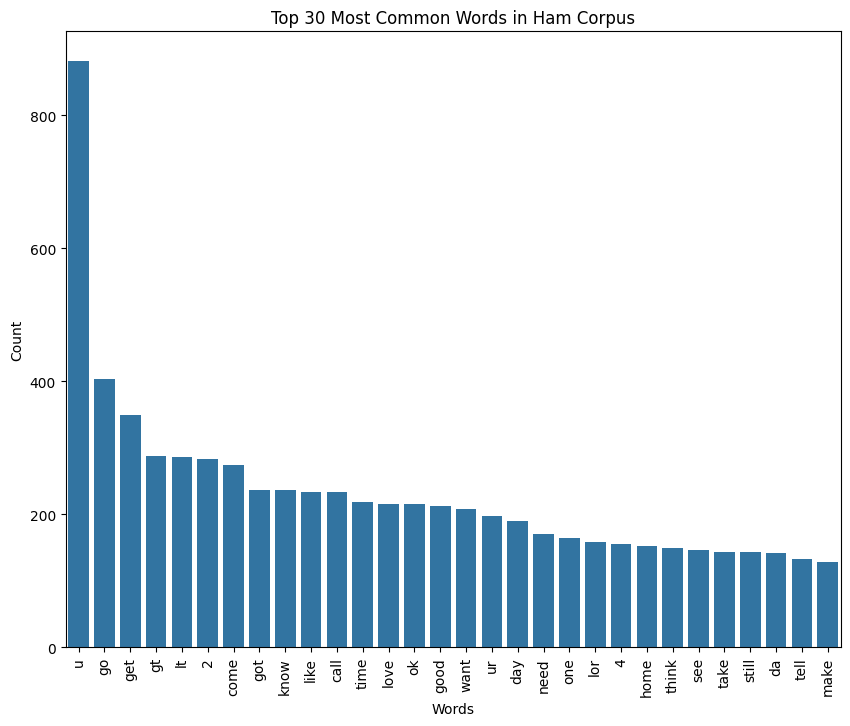

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming ham_corpus is already defined
# ham_corpus = [...]

# Get the 30 most common words
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [62]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


4. building the model

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer (max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [66]:
# appending the num_character col to X
#X= np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [67]:
X.shape

(5168, 3000)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [73]:
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[796 112]
 [ 23 103]]
0.4790697674418605


In [75]:
mnb.fit(X_train,y_train) 
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[908   0]
 [ 31  95]]
1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[903   5]
 [ 22 104]]
0.9541284403669725


In [77]:
# tfidf --> MNB

In [78]:
!pip install xgboost

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
# Initialize classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [81]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9709864603481625, 0.98)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9709864603481625
Precision -  0.98
For KN
Accuracy -  0.913926499032882
Precision -  1.0
For NB
Accuracy -  0.9700193423597679
Precision -  1.0
For DT
Accuracy -  0.9303675048355899
Precision -  0.78125
For LR
Accuracy -  0.9477756286266924
Precision -  0.9090909090909091
For RF
Accuracy -  0.9700193423597679
Precision -  0.9611650485436893


C:\Users\conta\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy -  0.9535783365570599
Precision -  0.8823529411764706
For Bgc
Accuracy -  0.9535783365570599
Precision -  0.8421052631578947
For ETC
Accuracy -  0.9642166344294004
Precision -  0.9158878504672897
For GBDT
Accuracy -  0.9410058027079303
Precision -  0.922077922077922
For xgb
Accuracy -  0.9632495164410058
Precision -  0.9313725490196079


In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.913926,1.000000
2,NB,0.970019,1.000000
0,SVC,0.970986,0.980000
5,RF,0.970019,0.961165
10,xgb,0.963250,0.931373
9,GBDT,0.941006,0.922078
8,ETC,0.964217,0.915888
4,LR,0.947776,0.909091
6,AdaBoost,0.953578,0.882353
7,Bgc,0.953578,0.842105


In [87]:
performance_df1 = pd.melt (performance_df, id_vars = "Algorithm")

In [88]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.913926
1,NB,Accuracy,0.970019
2,SVC,Accuracy,0.970986
3,RF,Accuracy,0.970019
4,xgb,Accuracy,0.963250
5,GBDT,Accuracy,0.941006
6,ETC,Accuracy,0.964217
7,LR,Accuracy,0.947776
8,AdaBoost,Accuracy,0.953578
9,Bgc,Accuracy,0.953578


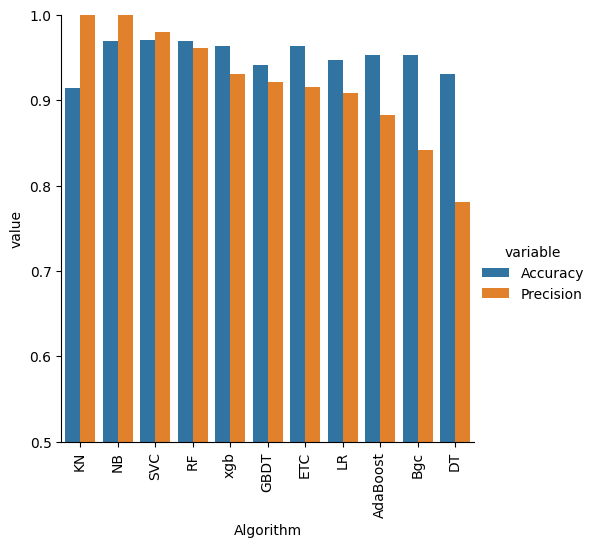

In [89]:
sns.catplot(x= 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks (rotation='vertical')
plt.show()

In [90]:
# model improve
# 1. Change the max_features parameter of IfIdf

In [91]:
# Assuming clfs, accuracy_scores, and precision_scores are already defined
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)


In [92]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:
new_df_scaled= new_df.merge(temp_df,on='Algorithm')

In [94]:
# Assuming clfs, accuracy_scores, and precision_scores are already defined
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=False)

In [95]:
merged_df = new_df_scaled.merge(temp_df, on='Algorithm')

In [96]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [98]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9805825242718447


In [100]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [101]:
from sklearn.ensemble import StackingClassifier

In [102]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [103]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9166666666666666


In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [105]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample text data and corresponding labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]  # Example labels (0 for negative, 1 for positive)

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)